## Data Checking

In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)

In [3]:
# Create a box plot to identify the outliers
plot_outlier <- function(dataframe, var_name, title) {
  plot <- ggplot(data = dataframe) +
    aes(x = "", y = get(var_name)) +
    geom_boxplot() +
    labs(x = title) +
    theme(
      axis.title.y = element_blank(),
      axis.title.x = element_text(size = 20),
      axis.text.y = element_text(size = 16)
    )
  return(plot)
}

### Import data

In [4]:
df0 <- read.csv("./data/S1Data.csv")

In [5]:
head(df0)

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,97,0,0,0,0,0,1,43,50,135,1.30,237000,358
2,180,0,1,1,1,0,1,73,30,142,1.18,160000,231
3,31,1,1,1,0,1,0,70,20,134,1.83,263358,582
4,87,0,1,0,0,0,1,65,25,141,1.10,298000,305
5,113,0,1,0,0,0,0,64,60,137,1.00,242000,1610
6,10,1,1,0,0,0,1,75,15,137,1.20,127000,246


### Naming

In [6]:
df0 <- df0 %>%
  rename_with(tolower) %>% 
  rename(platelets = pletelets)
colnames(df0)

[1] "time"              "event"             "gender"           
 [4] "smoking"           "diabetes"          "bp"               
 [7] "anaemia"           "age"               "ejection.fraction"
[10] "sodium"            "creatinine"        "platelets"        
[13] "cpk"

### Dimension

In [7]:
cat("Number of rows:", nrow(df0), "\n")
cat("Number of columns:", ncol(df0))

Number of rows: 299 
Number of columns: 13

### Data type

In [8]:
df0 <- df0 %>%
  mutate_at(vars(gender, smoking, diabetes, bp, anaemia), factor)
str(df0)

'data.frame':	299 obs. of  13 variables:
 $ time             : int  97 180 31 87 113 10 250 27 87 87 ...
 $ event            : int  0 0 1 0 0 1 0 1 0 0 ...
 $ gender           : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 2 2 2 ...
 $ smoking          : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 2 1 1 2 ...
 $ diabetes         : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 2 1 1 ...
 $ bp               : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 2 2 1 ...
 $ anaemia          : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 1 1 1 ...
 $ age              : num  43 73 70 65 64 75 70 94 75 80 ...
 $ ejection.fraction: int  50 30 20 25 60 15 40 38 45 25 ...
 $ sodium           : int  135 142 134 141 137 137 136 134 137 144 ...
 $ creatinine       : num  1.3 1.18 1.83 1.1 1 1.2 2.7 1.83 1.18 1.1 ...
 $ platelets        : num  237000 160000 263358 298000 242000 ...
 $ cpk              : int  358 231 582 305 1610 246 582 582 582 898 ...


### Missing values

In [9]:
data.frame(n_missing = colSums(is.na(df0))) %>%
  mutate(percentage_missing = n_missing / nrow(df0))

,n_missing,percentage_missing
,<dbl>,<dbl>
time,0,0
event,0,0
gender,0,0
smoking,0,0
diabetes,0,0
bp,0,0
anaemia,0,0
age,0,0
ejection.fraction,0,0


* There is no missing value

### Outliers

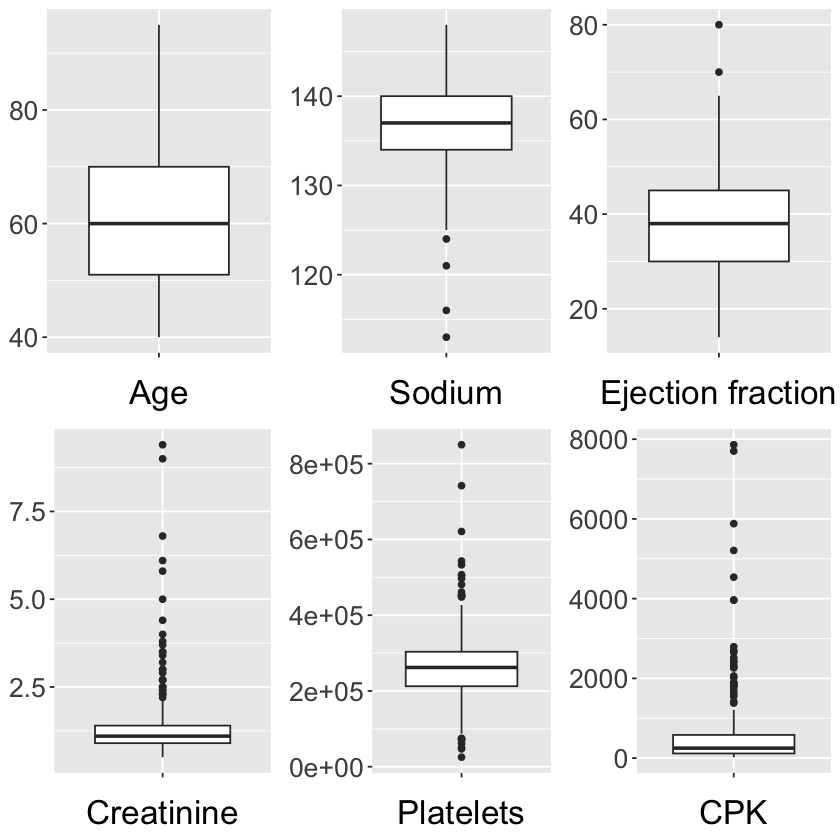

In [10]:
plot_age <- plot_outlier(df0, "age", "Age")
plot_sodium <- plot_outlier(df0, "sodium", "Sodium")
plot_ejection_fraction <- plot_outlier(df0, "ejection.fraction", "Ejection fraction")
plot_creatinine <- plot_outlier(df0, "creatinine", "Creatinine")
plot_platelets <- plot_outlier(df0, "platelets", "Platelets")
plot_cpk <- plot_outlier(df0, "cpk", "CPK")

ggplot_list <- list(
  plot_age, plot_sodium, plot_ejection_fraction,
  plot_creatinine, plot_platelets, plot_cpk)

grid.arrange(grobs = ggplot_list, ncol = 3)

* The variable `creatinine`, `platelets` and `cpk` have a number of outliers. 
* Transformation may be required.